In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import os
from acc import *
%load_ext autoreload
%autoreload 2
% matplotlib inline
from scipy import interpolate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


headers ['num_edges', 'acc_max', 'acc_balanced', 'f1', 'au_auc', 'au_prec', 'au_recall']
keys ['clime', 'clime_i', 'glasso', 'glasso_i', 'jgl_fused', 'jgl_group', 'nclime', 'nclime_i', 'nglasso', 'nglasso_i', 'nsimule', 'nsimule_i', 'simone', 'simone_i', 'simule', 'simule_i']
28 28
28 28
7 7
7 7
28 28
28 28
48 48
48 48
24 24
24 24
9 9
9 9
48 48
48 48
24 24
24 24


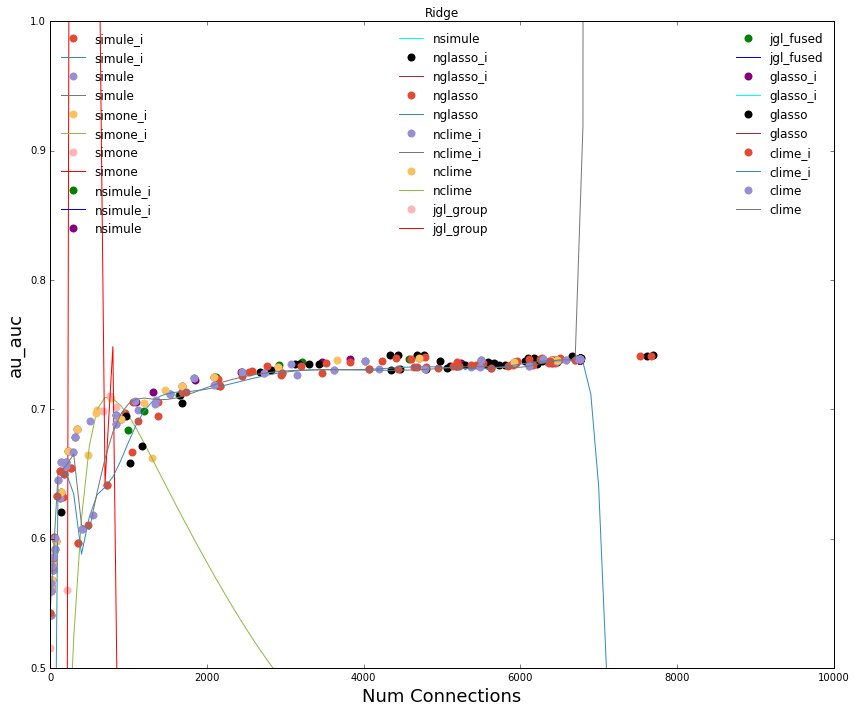

In [30]:
plot_setup()
headers = ['num_edges', 'acc_max', 'acc_balanced', 'f1', 'au_auc', 'au_prec', 'au_recall']
data_dirs = ['full_2']
stat = 'au_auc'
stats = load_all_stats(data_dirs, headers)
print("headers", headers)
print("keys", sorted(stats.keys()))

dirs_all = stats.keys()
dirs_to_plot = dirs_all
plt.title('Acc_AUC')

plt.title('Ridge')
for dir in sorted(dirs_to_plot, reverse=True):
    x = stats[dir]['num_edges_ridge']
    y = stats[dir][stat + '_ridge']
    
    points = zip(x, y)
    points = sorted(points, key=lambda point: point[0])
    x, y = zip(*points)
    print(len(x),len(y))
    tck = interpolate.splrep(np.array(x), np.array(y), s=0)
    xnew = np.arange(0, 10000, 100)
    ynew = interpolate.splev(xnew, tck, der=0)
#    plt.plot(xnew,ynew,label=dir)
    plt.plot(x,y,'o',label=dir)
    tck = interpolate.splrep(x, y, s=1)
    plt.plot(xnew,ynew,label=dir)
    plt.ylim((.5,1))
plt.xlabel('Num Connections')
plt.ylabel(stat)

plt.legend(frameon=False, loc="best", mode="expand", ncol=3)

# compare_regressions(stats, data_dirs, 'au_auc')
interactive_legend().show()
